In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
data = pd.read_csv('/content/sample_data/cardio_train.csv', sep=";")

In [82]:
data.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [83]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [84]:
data.tail()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1
69999,99999,20540,1,170,72.0,120,80,2,1,0,0,1,0


**Note:**

####Under gender
**1 - women**
**2 - men**
####Under cholesterol
**1: normal, 2: above normal, 3: well above normal**
####Under glucose level
**1: normal, 2: above normal, 3: well above normal**
####Under smoke
**0: non-smoker,1: smoker**
####Under alco
**0: non-alcohol adict,1: alcohol adict**
####Under active
**Physical activity**
####Under cardio
**0: absence, 1: presence**

Presence or absence of cardiovascular disease | Target Variable | cardio

In [85]:
print(data.shape)

(70000, 13)


In [86]:
data.isnull().sum()

,0
id,0
age,0
gender,0
height,0
weight,0
ap_hi,0
ap_lo,0
cholesterol,0
gluc,0
smoke,0


In [87]:
data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [89]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


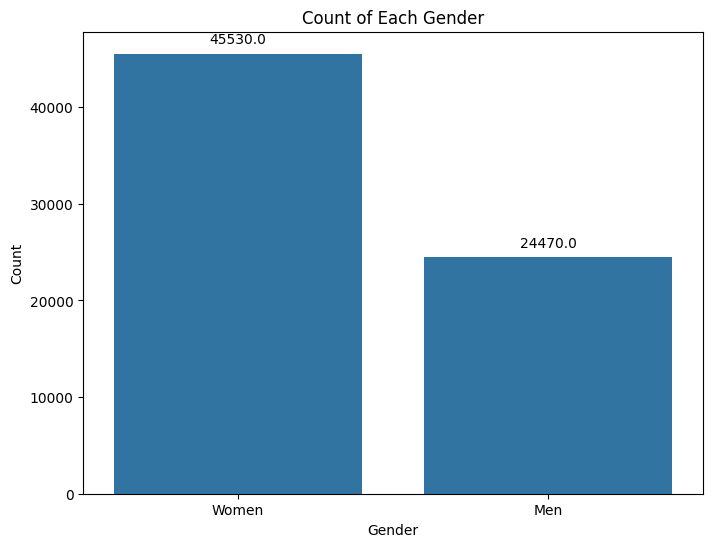

In [90]:

import seaborn as sns
import matplotlib.pyplot as plt

# Create the countplot
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='gender', data=data)

# Add labels to each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Set labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Count of Each Gender')
plt.xticks([0, 1], ['Women', 'Men'])

# Display the plot
plt.show()


In [91]:
# Assuming 'age' column represents age in days
data['age'] = (data['age'] / 365.25).astype(int)


In [92]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0


<ipython-input-93-920cbe830cc8>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_cardio_counts = data.groupby(['age_group', 'cardio'])['cardio'].count().unstack()


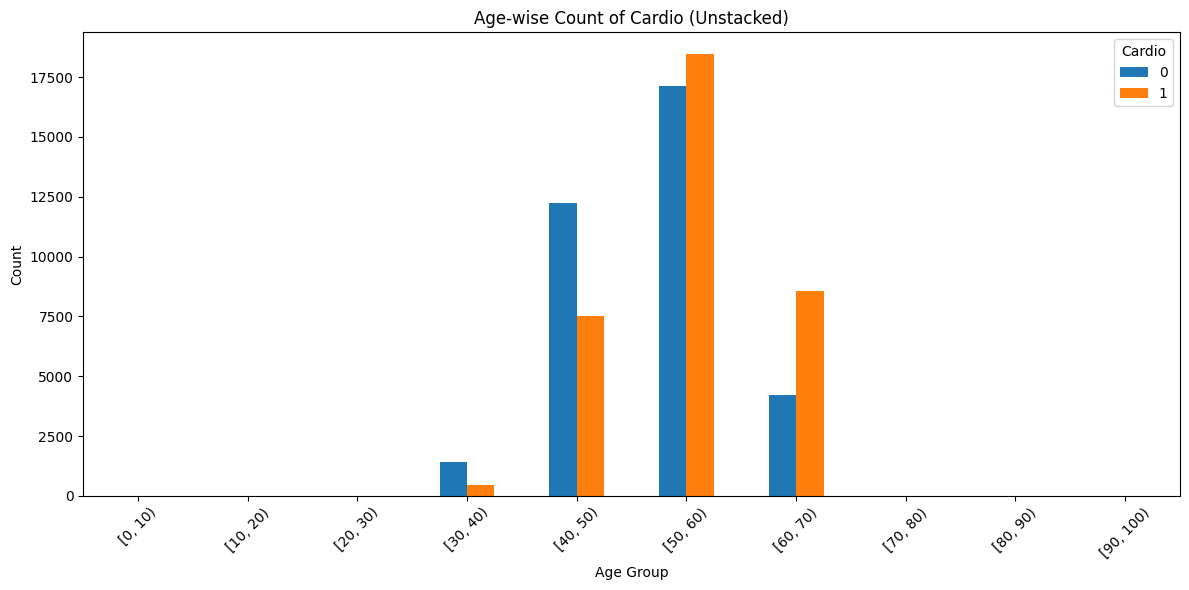

In [93]:
# Group ages into categories of 10
data['age_group'] = pd.cut(data['age'], bins=range(0, 101, 10), right=False)

# Create the unstacked histogram
age_cardio_counts = data.groupby(['age_group', 'cardio'])['cardio'].count().unstack()
age_cardio_counts.plot(kind='bar', stacked=False, figsize=(12, 6))

plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Age-wise Count of Cardio (Unstacked)')
plt.xticks(rotation=45)
plt.legend(title='Cardio')
plt.tight_layout()
plt.show()

In [94]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_group
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0,"[50, 60)"
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1,"[50, 60)"
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1,"[50, 60)"
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1,"[40, 50)"
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0,"[40, 50)"


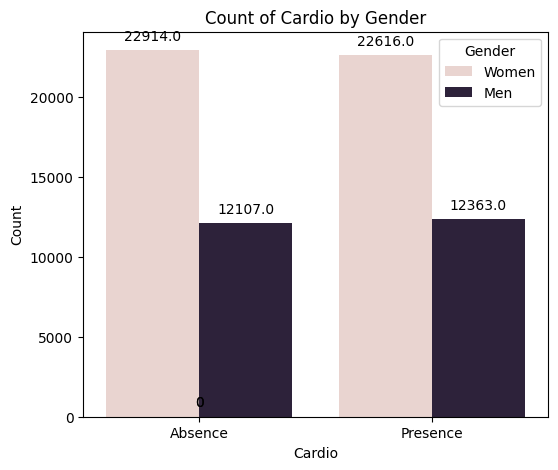

In [95]:
# Create the countplot
plt.figure(figsize=(6, 5))
ax = sns.countplot(x='cardio', hue='gender', data=data)

# Add labels to each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Set labels and title
plt.xlabel('Cardio')
plt.ylabel('Count')
plt.title('Count of Cardio by Gender')
plt.xticks([0, 1], ['Absence', 'Presence'])
plt.legend(title='Gender', labels=['Women', 'Men'])

# Display the plot
plt.show()

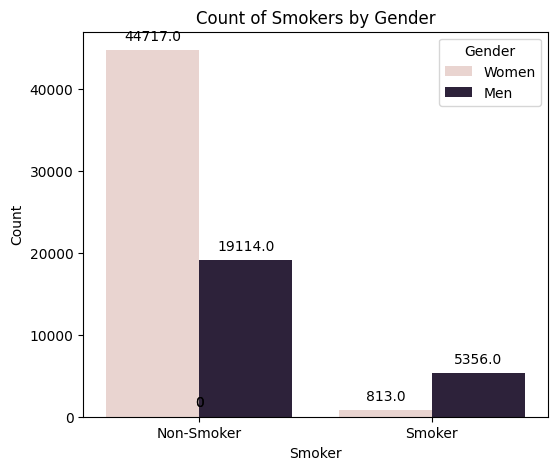

In [96]:
# Create the countplot
plt.figure(figsize=(6, 5))
ax = sns.countplot(x='smoke', hue='gender', data=data)

# Add labels to each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Set labels and title
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.title('Count of Smokers by Gender')
plt.xticks([0, 1], ['Non-Smoker', 'Smoker'])
plt.legend(title='Gender', labels=['Women', 'Men'])

# Display the plot
plt.show()

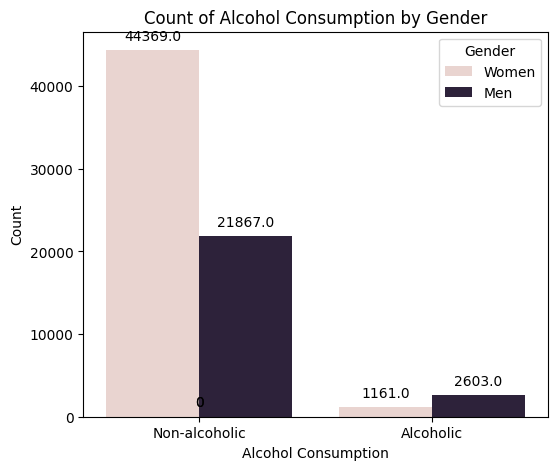

In [97]:
# Create the countplot
plt.figure(figsize=(6, 5))
ax = sns.countplot(x='alco', hue='gender', data=data)

# Add labels to each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Set labels and title
plt.xlabel('Alcohol Consumption')
plt.ylabel('Count')
plt.title('Count of Alcohol Consumption by Gender')
plt.xticks([0, 1], ['Non-alcoholic', 'Alcoholic'])
plt.legend(title='Gender', labels=['Women', 'Men'])

# Display the plot
plt.show()

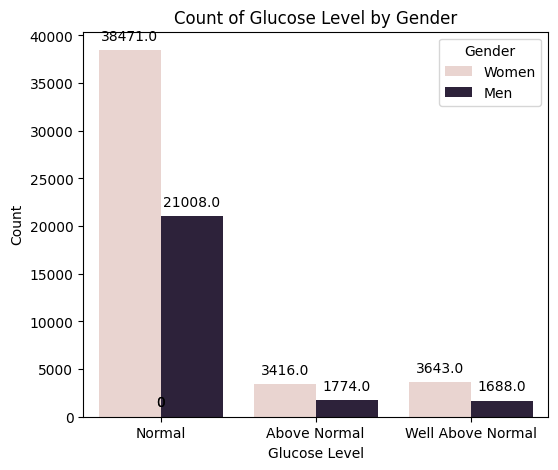

In [98]:
# Create the countplot
plt.figure(figsize=(6, 5))
ax = sns.countplot(x='gluc', hue='gender', data=data)

# Add labels to each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Set labels and title
plt.xlabel('Glucose Level')
plt.ylabel('Count')
plt.title('Count of Glucose Level by Gender')
plt.xticks([0, 1, 2], ['Normal', 'Above Normal', 'Well Above Normal']) # Assuming 0,1,2 represent these levels
plt.legend(title='Gender', labels=['Women', 'Men'])

# Display the plot
plt.show()

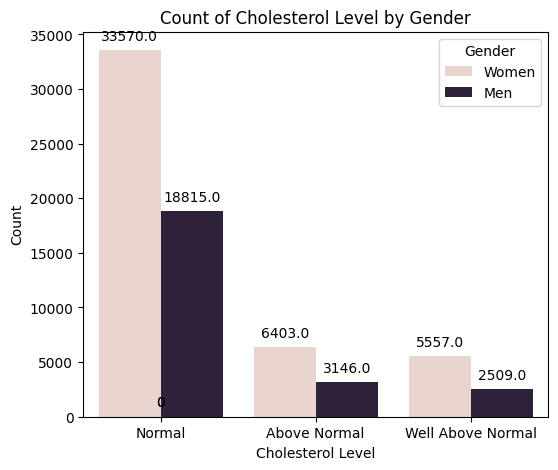

In [99]:
# Create the countplot
plt.figure(figsize=(6, 5))
ax = sns.countplot(x='cholesterol', hue='gender', data=data)

# Add labels to each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Set labels and title
plt.xlabel('Cholesterol Level')
plt.ylabel('Count')
plt.title('Count of Cholesterol Level by Gender')
plt.xticks([0, 1, 2], ['Normal', 'Above Normal', 'Well Above Normal']) # Assuming 0,1,2 represent these levels
plt.legend(title='Gender', labels=['Women', 'Men'])

# Display the plot
plt.show()

<Axes: >

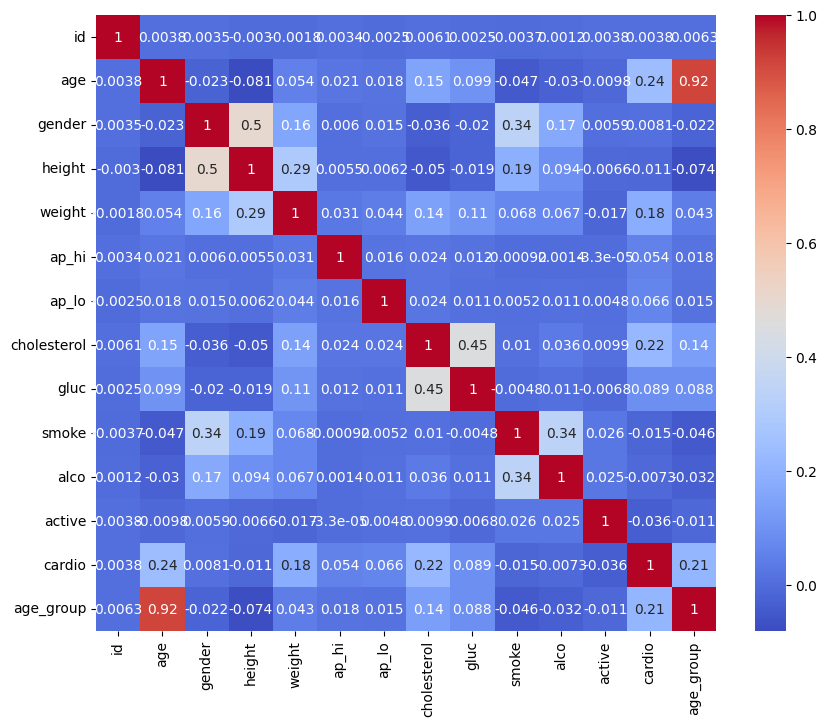

In [100]:
for col in data.select_dtypes(include=['interval', 'category']).columns:
    if data[col].dtype.name == 'category':
        if isinstance(data[col].cat.categories[0], pd.Interval): # Corrected indentation for nested if
            data[col] = data[col].apply(lambda x: x.mid if isinstance(x, pd.Interval) else x) # Corrected indentation for this line
    elif data[col].dtype.name == 'interval': # Corrected indentation to align with the outer if
        data[col] = data[col].apply(lambda x: x.mid if isinstance(x, pd.Interval) else x)

# Calculate correlation and plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linecolor='white')

In [101]:
data.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio',
       'age_group'],
      dtype='object')

In [102]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_group
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0,55.0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1,55.0
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1,55.0
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1,45.0
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0,45.0


In [103]:
from sklearn.model_selection import train_test_split

In [104]:
X = data[['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']]
y = data['cardio']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42)

In [105]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.7398571428571429


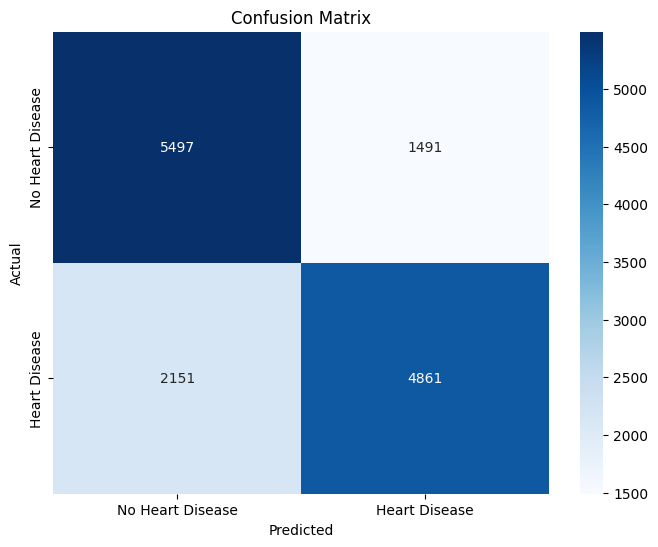

In [106]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Heart Disease', 'Heart Disease'],
            yticklabels=['No Heart Disease', 'Heart Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [107]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred, output_dict=True)

print(f"F1 Score: {report['macro avg']['f1-score']}")
print(f"Recall: {report['macro avg']['recall']}")
print(f"Precision: {report['macro avg']['precision']}")

F1 Score: 0.739319161446574
Recall: 0.7399371949174708
Precision: 0.7420103904282116


In [108]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_group
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0,55.0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1,55.0
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1,55.0
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1,45.0
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0,45.0


In [109]:
print("Class distribution in training data:")
print(y_train.value_counts())



Class distribution in training data:
cardio
0    28033
1    27967
Name: count, dtype: int64


In [110]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import joblib

In [111]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_group
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0,55.0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1,55.0
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1,55.0
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1,45.0
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0,45.0


In [112]:
new_data = data.drop(columns=['age_group'])

In [113]:
new_data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0


In [114]:
new_data['risk'] = new_data['cardio'].map({0: 'Low risk of heart disease', 1: 'High risk of heart disease. Consult your doctor'})

X = new_data.drop(columns=['id', 'cardio', 'risk'])
y = new_data['risk']

X['BMI'] = X['weight'] / (X['height'] / 100) ** 2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = RandomForestClassifier(n_estimators=200, max_depth=20, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

joblib.dump(model, 'heart_disease_model_9.pkl')
joblib.dump(scaler, 'scaler9.pkl')

Accuracy: 0.7304285714285714
Classification Report:
                                                  precision    recall  f1-score   support

High risk of heart disease. Consult your doctor       0.75      0.70      0.72      7012
                      Low risk of heart disease       0.71      0.77      0.74      6988

                                       accuracy                           0.73     14000
                                      macro avg       0.73      0.73      0.73     14000
                                   weighted avg       0.73      0.73      0.73     14000



['scaler9.pkl']